In [126]:
from mrsimulator import Simulator, SpinSystem, Site
from mrsimulator.method.lib import BlochDecaySpectrum

In [127]:
import matplotlib.pyplot as plt

In [128]:
import numpy as np

In [129]:
from mrsimulator.method.lib import BlochDecayCTSpectrum
from mrsimulator.models import ExtCzjzekDistribution
from mrsimulator.utils.collection import single_site_system_generator
from mrsimulator.method import SpectralDimension
from mrsimulator import signal_processor as sp
from mrsimulator.spin_system.tensors import SymmetricTensor

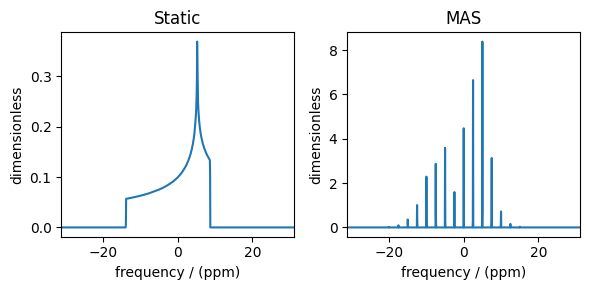

In [130]:
H_site = Site(isotope="1H", shielding_symmetric={"zeta": 13.89, "eta": 0.25})
spin_system = SpinSystem(sites=[H_site])
# Make static and MAS one-pulse acquire Method objects
static = BlochDecaySpectrum(channels=["1H"])
mas = BlochDecaySpectrum(channels=["1H"], rotor_frequency=1000) # in Hz
# Setup and run the Simulation object
sim = Simulator(spin_systems=[spin_system], methods=[static, mas])
sim.run()
# Plot the spectra
fig, ax = plt.subplots(1, 2, figsize=(6, 3), subplot_kw={"projection": "csdm"})
ax[0].plot(sim.methods[0].simulation.real)
ax[0].set_title("Static")
ax[1].plot(sim.methods[1].simulation.real)
ax[1].set_title("MAS")
plt.tight_layout()
plt.show()

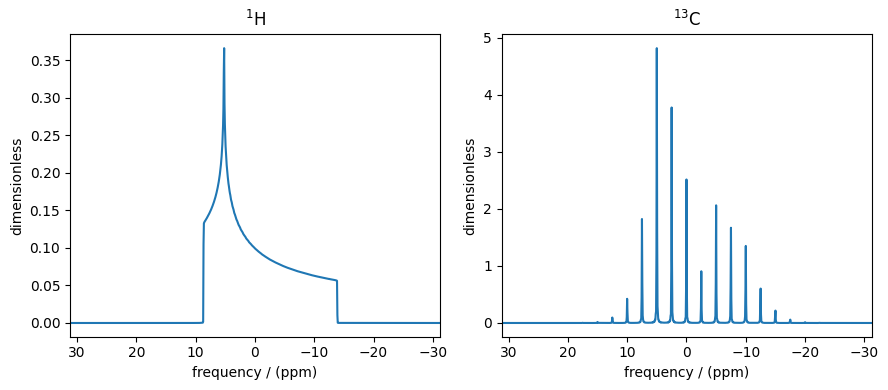

In [131]:
# Get the simulation datasets
H_spectrum = sim.methods[0].simulation
C_spectrum = sim.methods[1].simulation
# Create the signal processors
processor_1H = sp.SignalProcessor(
    operations=[
        sp.IFFT(),
        sp.apodization.Exponential(FWHM="1 Hz"),
        sp.FFT(),
        ]
)
processor_13C = sp.SignalProcessor(
    operations=[
        sp.IFFT(),
        sp.apodization.Exponential(FWHM="20 Hz"),
        sp.FFT(),
    ]
)
# apply the signal processors
processed_H_spectrum=processor_1H.apply_operations(dataset=H_spectrum)
processed_C_spectrum=processor_13C.apply_operations(dataset=C_spectrum)

fig, ax = plt.subplots(
    nrows=1, ncols=2, subplot_kw={"projection": "csdm"}, figsize=[9, 4]
)

ax[0].plot(processed_H_spectrum.real)
ax[0].invert_xaxis()
ax[0].set_title("$^1$H")

ax[1].plot(processed_C_spectrum.real)
ax[1].invert_xaxis()
ax[1].set_title("$^{13}$C")

plt.tight_layout()
plt.show()


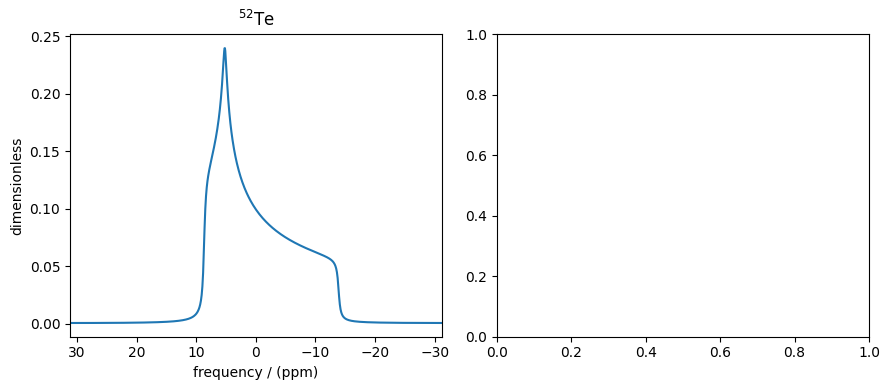

In [132]:
# Get the simulation datasets
Te_spectrum = sim.methods[0].simulation

# Create the signal processors
processor_52Te = sp.SignalProcessor(
    operations=[
        sp.IFFT(),
        sp.apodization.Exponential(FWHM="200 Hz"),
        sp.FFT(),
    ]
)
# apply the signal processors
processed_Te_spectrum=processor_52Te.apply_operations(dataset=Te_spectrum)

fig, ax = plt.subplots(
    nrows=1, ncols=2, subplot_kw={"projection": "csdm"}, figsize=[9, 4]
)

ax[0].plot(processed_Te_spectrum.real)
ax[0].invert_xaxis()
ax[0].set_title("$^{52}$Te")

plt.tight_layout()
plt.show()
